In [78]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
f1 = open('X_train', 'rb')
X_train = pickle.load(f1)
f1.close()
f2 = open('X_test', 'rb')
X_test = pickle.load(f2)
f2.close()
dataTrain = pd.read_pickle('trainReduced')
dataTest = pd.read_pickle('testReduced')
y_train = dataTrain['target'].values
y_test = dataTest['target'].values

In [8]:
#tfidf of input matrices is recommended for SVD, since it makes features more Gaussian like
from sklearn.feature_extraction.text import TfidfTransformer
tf = TfidfTransformer(smooth_idf=True, sublinear_tf=True)
#sublinear replaces tf with 1+log(tf)

In [66]:
X_traintf = tf.fit_transform(X_train)
X_testtf = tf.transform(X_test)

# Truncated SVD
### 100 components

In [18]:
from sklearn.decomposition import TruncatedSVD
tsvd100 = TruncatedSVD(n_components=100)

In [21]:
X_train100 = tsvd100.fit_transform(X_traintf)

In [68]:
X_test100 = tsvd100.transform(X_testtf)

In [22]:
#explains only 12.2% variance
tsvd100.explained_variance_ratio_.sum()

0.12285585212559036

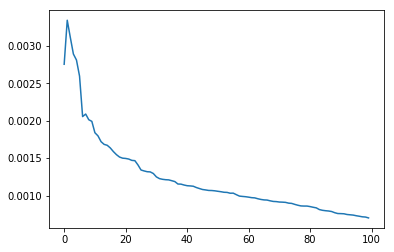

In [30]:
plt.plot(np.arange(0,len(tsvd100.explained_variance_ratio_)),tsvd100.explained_variance_ratio_ )

### 200 components

In [24]:
tsvd200 = TruncatedSVD(n_components = 200)

In [25]:
X_train200 = tsvd200.fit_transform(X_traintf)

In [70]:
X_test200 = tsvd200.transform(X_testtf)

In [26]:
tsvd200.explained_variance_ratio_.sum()

0.18746746523707786

### 300 components

In [32]:
tsvd300 = TruncatedSVD(n_components=300)

In [33]:
X_train300 = tsvd300.fit_transform(X_traintf)

In [71]:
X_test300 = tsvd300.transform(X_testtf)

In [34]:
tsvd300.explained_variance_ratio_.sum()

0.23837467036559318

### 500 components

In [35]:
tsvd500 = TruncatedSVD(n_components=500)

In [36]:
X_train500 = tsvd500.fit_transform(X_traintf)

In [72]:
X_test500 = tsvd500.transform(X_testtf)

In [37]:
tsvd500.explained_variance_ratio_.sum()

0.3172053628718632

## Seeing how they perform

In [74]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [41]:
from sklearn.ensemble import RandomForestClassifier
#reasonable RFC
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=3, min_samples_split=10, 
                             min_samples_leaf=10, class_weight='balanced')

### 100 components

In [42]:
rfc.fit(X_train100, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [73]:
rfc.score(X_test100, y_test)

0.7263

In [75]:
scores100 = precision_recall_fscore_support(y_test, rfc.predict(X_test100))

In [77]:
scores_table100 = pd.DataFrame(np.empty((len(scores100[0]),4)), columns=['precision','recall','f1','support'])
for i in range(0,len(scores100[0])):
    scores_table100.iloc[i,:] = [x[i] for x in scores100]
scores_table100

,precision,recall,f1,support
0,0.972109,0.728342,0.832753,18711.0
1,0.150142,0.696664,0.247043,1289.0


Text(33.0, 0.5, 'true')

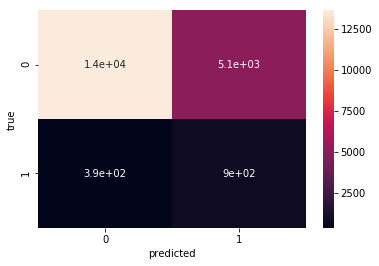

In [79]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test100)), annot=True)
plt.xlabel('predicted')
plt.ylabel('true')

Really not bad, given that we reduced 19311 to 100 features. Probably could perform much better with XGBoost and grid search.

### 200 components

In [83]:
rfc.fit(X_train200, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [84]:
rfc.score(X_test200, y_test)

0.73655

In [85]:
scores200 = precision_recall_fscore_support(y_test, rfc.predict(X_test200))

In [86]:
scores_table200 = pd.DataFrame(np.empty((len(scores100[0]),4)), columns=['precision','recall','f1','support'])
for i in range(0,len(scores100[0])):
    scores_table200.iloc[i,:] = [x[i] for x in scores200]
scores_table200

,precision,recall,f1,support
0,0.971517,0.740099,0.840164,18711.0
1,0.153672,0.685027,0.251031,1289.0


Text(33.0, 0.5, 'true')

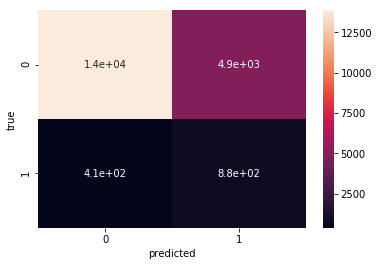

In [87]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test200)), annot=True)
plt.xlabel('predicted')
plt.ylabel('true')

Slight shift towards better precision, lower recall for insincere (less sincere and more insincere misclassified).

### 300 components

In [88]:
rfc.fit(X_train300, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [89]:
rfc.score(X_test300, y_test)

0.7499

In [90]:
scores300 = precision_recall_fscore_support(y_test, rfc.predict(X_test300))

In [91]:
scores_table300 = pd.DataFrame(np.empty((len(scores100[0]),4)), columns=['precision','recall','f1','support'])
for i in range(0,len(scores100[0])):
    scores_table300.iloc[i,:] = [x[i] for x in scores300]
scores_table300

,precision,recall,f1,support
0,0.968364,0.757415,0.849997,18711.0
1,0.153961,0.640807,0.248272,1289.0


Text(33.0, 0.5, 'true')

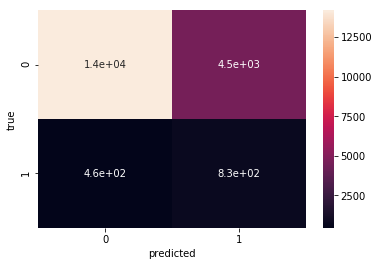

In [92]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test300)), annot=True)
plt.xlabel('predicted')
plt.ylabel('true')

Trend continues.

### 500 components

In [93]:
rfc.fit(X_train500, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [95]:
rfc.score(X_test500, y_test)

0.76065

In [96]:
scores500 = precision_recall_fscore_support(y_test, rfc.predict(X_test500))

In [97]:
scores_table500 = pd.DataFrame(np.empty((len(scores100[0]),4)), columns=['precision','recall','f1','support'])
for i in range(0,len(scores100[0])):
    scores_table500.iloc[i,:] = [x[i] for x in scores500]
scores_table500

,precision,recall,f1,support
0,0.968822,0.768906,0.857364,18711.0
1,0.160388,0.640807,0.256562,1289.0


Text(33.0, 0.5, 'true')

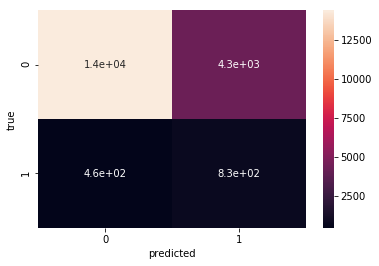

In [98]:
sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test500)), annot=True)
plt.xlabel('predicted')
plt.ylabel('true')

Precision increased a bit.